In [60]:
import pandas as pd

In [61]:
df = pd.read_csv('income.csv')

In [62]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [63]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [64]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [65]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [66]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relatioship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [67]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [68]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [69]:
df['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [70]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

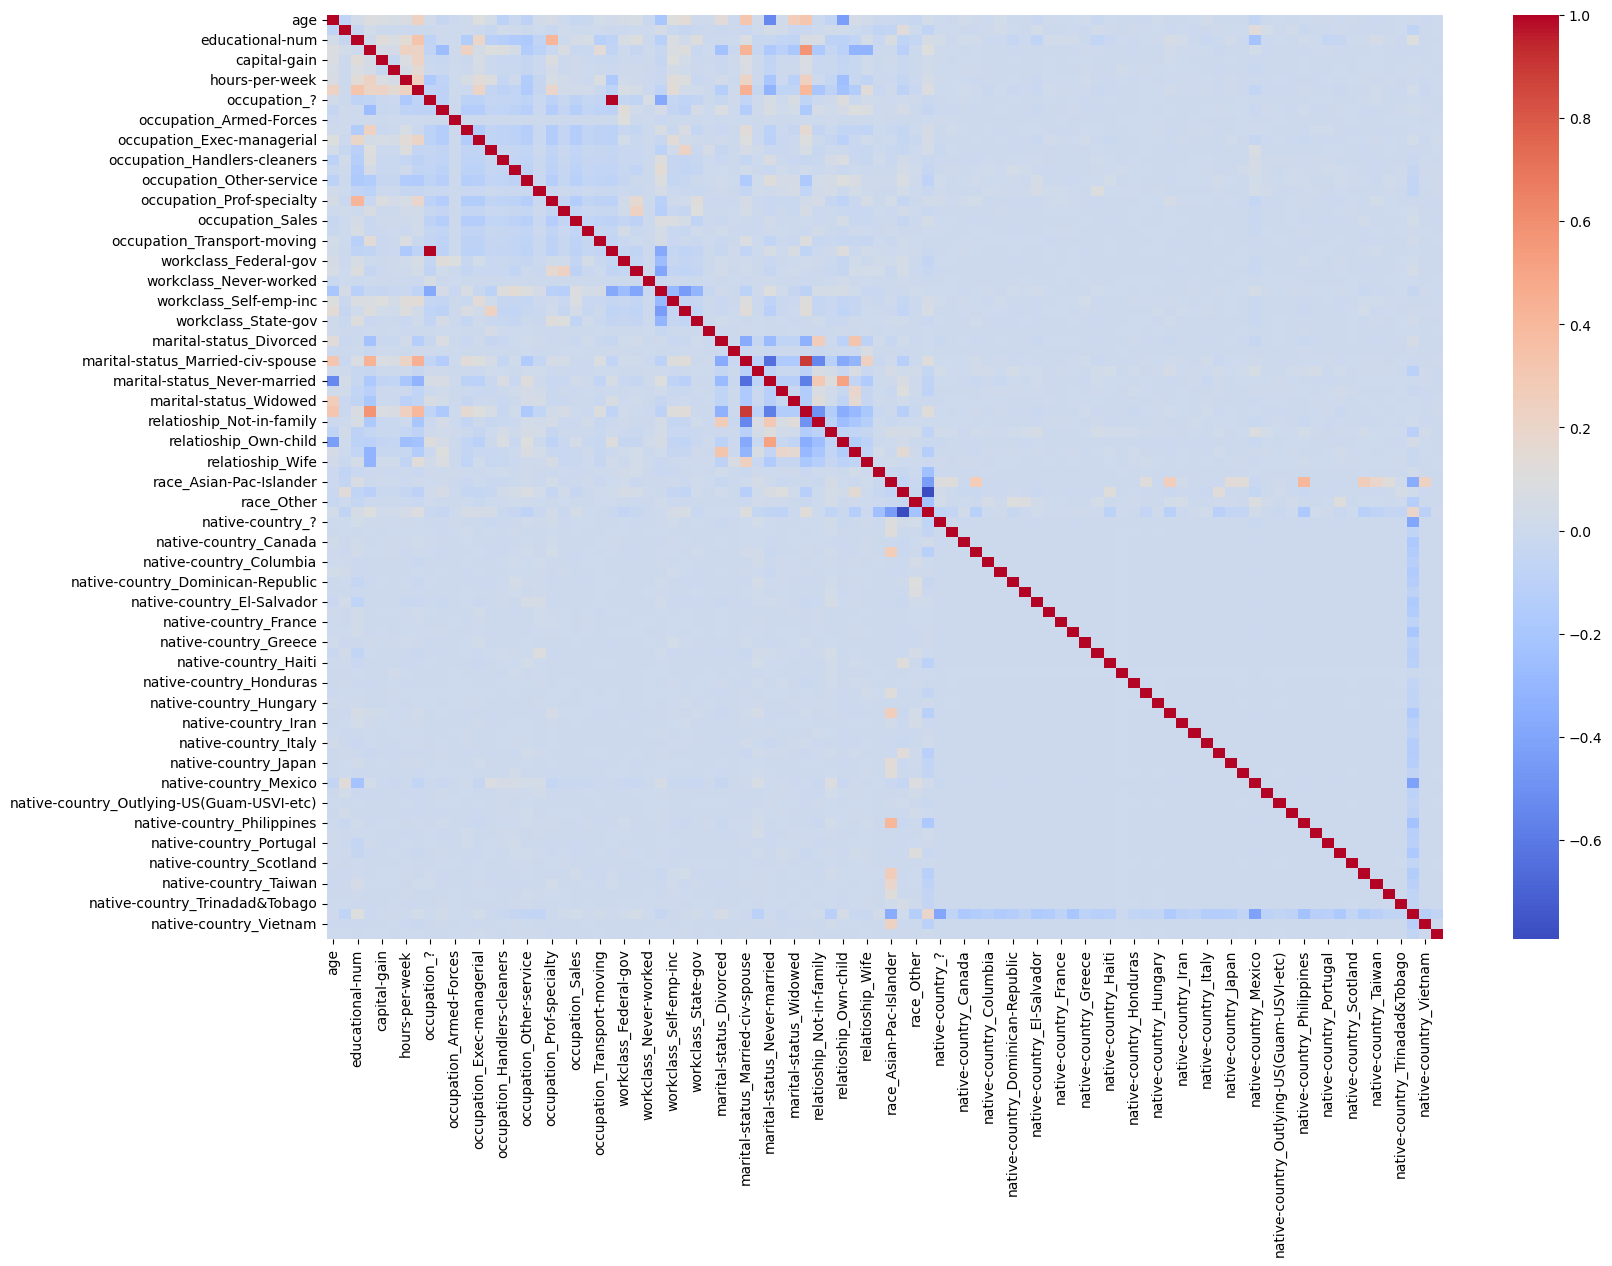

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [72]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [74]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [75]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relatioship_Husband,relatioship_Not-in-family,relatioship_Own-child,relatioship_Unmarried,relatioship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

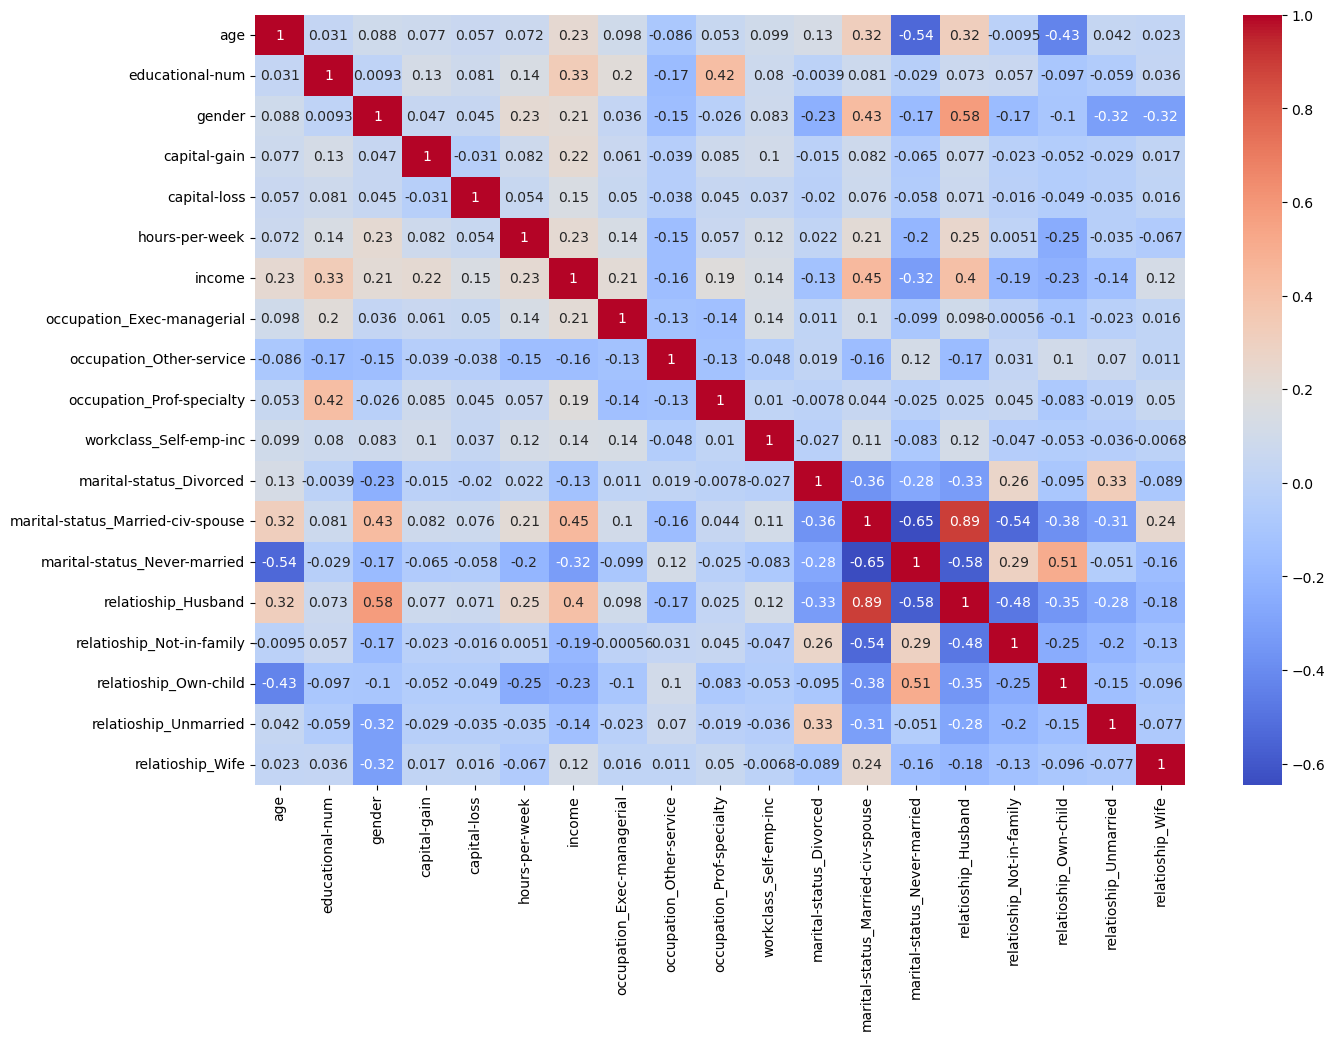

In [77]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)

In [90]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
38863,17,7,0,0,0,16,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10183,26,14,0,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11798,26,7,1,0,0,45,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
29949,64,5,0,0,0,38,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
28411,55,3,1,0,0,48,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44605,32,13,1,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
28278,24,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
24934,42,11,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20426,36,13,0,0,0,50,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
5180,34,13,1,0,0,21,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47789,48,13,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
43158,23,13,1,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
21338,26,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45018,38,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8508,58,9,1,3137,0,16,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9016,29,10,1,0,0,44,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
29134,37,15,1,0,0,6,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
40567,55,6,1,2580,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [92]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [93]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [94]:
forest.score(test_X, test_y)

0.8468625243115979

In [95]:
forest.feature_importances_

array([2.26446672e-01, 1.30856242e-01, 1.55981111e-02, 1.15800147e-01,
       3.74353615e-02, 1.14268328e-01, 1.86022266e-03, 5.16883890e-03,
       9.10232549e-05, 6.00018174e-03, 2.11758994e-02, 5.09517936e-03,
       3.25249831e-03, 4.04383971e-03, 7.75344110e-03, 1.82769829e-04,
       1.65396570e-02, 2.71210404e-03, 6.09384008e-03, 4.07010835e-03,
       4.13451738e-03, 1.61669917e-03, 4.95057148e-03, 5.43022035e-03,
       2.25261664e-06, 9.31863958e-03, 6.24795421e-03, 8.47414510e-03,
       4.42815347e-03, 1.58284128e-04, 6.75527253e-03, 3.57890343e-04,
       6.55670384e-02, 9.74864439e-04, 2.32939297e-02, 2.03262356e-03,
       1.67154409e-03, 4.76817503e-02, 1.32602580e-02, 1.49097584e-03,
       8.72686897e-03, 5.23144870e-03, 1.13131161e-02, 1.47061886e-03,
       2.79909036e-03, 4.30415640e-03, 1.06847946e-03, 6.19272699e-03,
       2.65172402e-03, 3.06543504e-04, 1.56728138e-03, 6.31317250e-04,
       2.05639908e-04, 7.16746465e-04, 2.77545578e-04, 1.43489357e-04,
      

In [96]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [97]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key= lambda x: x[1], reverse=True)}

In [98]:
importances

{'age': 0.22644667165603502,
 'educational-num': 0.13085624245580824,
 'capital-gain': 0.11580014734038425,
 'hours-per-week': 0.11426832813882491,
 'marital-status_Married-civ-spouse': 0.06556703837516521,
 'relatioship_Husband': 0.047681750316211725,
 'capital-loss': 0.037435361535604554,
 'marital-status_Never-married': 0.023293929675786473,
 'occupation_Exec-managerial': 0.021175899449508512,
 'occupation_Prof-specialty': 0.016539657003155836,
 'gender': 0.015598111068350273,
 'relatioship_Not-in-family': 0.01326025800610412,
 'relatioship_Wife': 0.011313116111819297,
 'workclass_Private': 0.009318639583698845,
 'relatioship_Own-child': 0.008726868966170179,
 'workclass_Self-emp-not-inc': 0.008474145100645692,
 'occupation_Other-service': 0.007753441100112239,
 'marital-status_Divorced': 0.00675527252610873,
 'workclass_Self-emp-inc': 0.006247954213021928,
 'race_White': 0.0061927269878023225,
 'native-country_United-States': 0.006192377151043388,
 'occupation_Sales': 0.00609384007

In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param_grid, verbose=10)

In [101]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.3s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   0.3s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.3s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

[CV 4/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.818 total time=   0.5s
[CV 5/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.819 total time=   0.5s
[CV 1/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.818 total time=   1.1s
[CV 2/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 2/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.817 total time=   1.2s
[CV 3/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 3/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.819 total time=   1.1s
[CV 4/5; 9/48] START max_d

[CV 3/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.860 total time=   0.5s
[CV 4/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 4/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.861 total time=   0.5s
[CV 5/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 5/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.864 total time=   0.5s
[CV 1/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 1/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.859 total time=   0.9s
[CV 2/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 2/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.864 total time=   0.9s
[CV 3/5; 17/4

[CV 1/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=   1.8s
[CV 2/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 2/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.858 total time=   1.8s
[CV 3/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 3/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.853 total time=   1.8s
[CV 4/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 4/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.860 total time=   1.8s
[CV 5/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 5/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.859 total time=   1.8s
[CV 1/5;

[CV 4/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.862 total time=   0.8s
[CV 5/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.8s
[CV 1/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 1/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.859 total time=   1.6s
[CV 2/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.859 total time=   1.6s
[CV 3/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.862 total time=   1.6s
[CV 4/5; 32

[CV 2/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.850 total time=   4.8s
[CV 3/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.855 total time=   4.8s
[CV 4/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.854 total time=   4.9s
[CV 5/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 5/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.848 total time=   5.1s
[CV 1/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 1/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.854 total time=

[CV 5/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.851 total time=   0.8s
[CV 1/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 1/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.851 total time=   1.7s
[CV 2/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 2/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.852 total time=   1.7s
[CV 3/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 3/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.856 total time=   1.7s
[CV 4/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 4/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.859 total time

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [102]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=50)

In [103]:
forest = grid_search.best_estimator_

In [104]:
forest.score(test_X, test_y)

0.8566895280990889

In [107]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [108]:
importances

{'age': 0.1529836658048742,
 'capital-gain': 0.13457511731112334,
 'educational-num': 0.13317629202331033,
 'hours-per-week': 0.09397188168904848,
 'marital-status_Married-civ-spouse': 0.09126090434409104,
 'relatioship_Husband': 0.05648233148719605,
 'capital-loss': 0.04387105258682406,
 'marital-status_Never-married': 0.031157707418805528,
 'occupation_Exec-managerial': 0.026914058501417797,
 'occupation_Prof-specialty': 0.02173403427055979,
 'relatioship_Not-in-family': 0.01534090063880986,
 'gender': 0.014591840995611793,
 'relatioship_Wife': 0.012583246143946283,
 'relatioship_Own-child': 0.010076388442143145,
 'workclass_Self-emp-not-inc': 0.00898335914815881,
 'marital-status_Divorced': 0.008943920070830879,
 'workclass_Private': 0.008516711251717178,
 'occupation_Other-service': 0.007690471074068918,
 'workclass_Self-emp-inc': 0.007683621899695632,
 'relatioship_Unmarried': 0.00729641261899073,
 'race_White': 0.006179403469537342,
 'native-country_United-States': 0.006084865795